In [98]:
import torch 
import numpy as np
from torch import nn

In [99]:
bs, seq_len, embedding_dim = 20,5,10
x = torch.randn(bs, seq_len, embedding_dim)

In [100]:
ln = nn.LayerNorm(embedding_dim)

In [101]:
x_ln = ln(x)

In [102]:
print(x_ln[1,3,:].mean())
print(x_ln[1,3,:].std())

tensor(-3.4273e-08, grad_fn=<MeanBackward0>)
tensor(1.0541, grad_fn=<StdBackward0>)


In [103]:
class RMSNorm(torch.nn.Module):
    def __init__(self, dim: int, eps: float = 1e-6):
        """
        Initialize the RMSNorm normalization layer.

        Args:
            dim (int): The dimension of the input tensor.
            eps (float, optional): A small value added to the denominator for numerical stability. Default is 1e-6.

        Attributes:
            eps (float): A small value added to the denominator for numerical stability.
            weight (nn.Parameter): Learnable scaling parameter.

        """
        super().__init__()
        self.eps = eps
        self.weight = nn.Parameter(torch.ones(dim))

    def _norm(self, x):
        """
        Apply the RMSNorm normalization to the input tensor.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The normalized tensor.

        """
        return x * torch.rsqrt(x.pow(2).mean(-1, keepdim=True) + self.eps)

    def forward(self, x):
        """
        Forward pass through the RMSNorm layer.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor after applying RMSNorm.

        """
        output = self._norm(x.float()).type_as(x)
        return output * self.weight

In [104]:
rms_norm = RMSNorm(embedding_dim)

In [105]:
x_rms = rms_norm(x)

In [106]:
x[0,0,:]

tensor([-0.9343, -0.0450, -0.3578,  0.8171, -0.5382, -0.1084,  1.6580,  0.3483,
         0.6574, -0.0109])

In [107]:
x[0,0,:]/torch.sqrt(torch.sum(x[0,0,:].pow(2))/embedding_dim)

tensor([-1.2865, -0.0620, -0.4926,  1.1251, -0.7411, -0.1492,  2.2829,  0.4795,
         0.9052, -0.0151])

In [108]:
x_rms[0,0,:]

tensor([-1.2865, -0.0620, -0.4926,  1.1251, -0.7411, -0.1492,  2.2829,  0.4795,
         0.9052, -0.0151], grad_fn=<SliceBackward0>)

In [109]:
torch.norm(x_rms[0,0,:])

tensor(3.1623, grad_fn=<LinalgVectorNormBackward0>)

In [110]:
np.sqrt(embedding_dim)

np.float64(3.1622776601683795)

In [111]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def swiglu(x):
    return x * sigmoid(x)

In [112]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

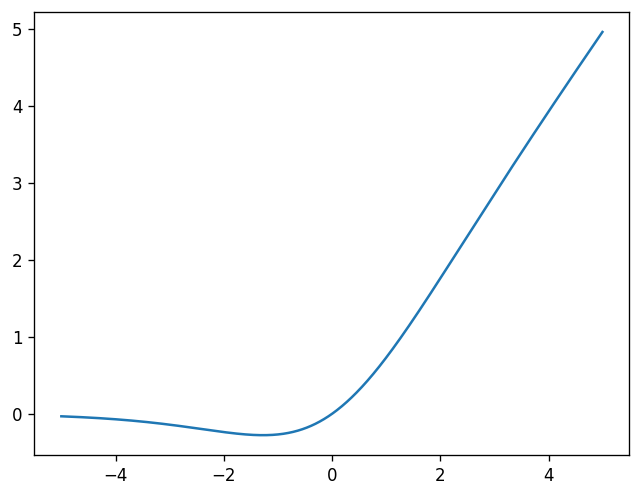

In [113]:
x = np.arange(-5,5,0.01)
plt.plot(x,swiglu(x))

In [114]:
x = torch.randn(5)

In [115]:
x / (1 + torch.exp(-x))

tensor([ 1.3710,  0.5098, -0.1428,  0.3987, -0.2641])

In [ ]:
import torch.nn.functional as F

In [ ]:
F.silu(x)